1. Install necessary packages : 

We start by installing the necessary packages such as `nltk`, `matplotlib`, and `wordcloud`.

In [279]:
#!pip install nltk matplotlib wordcloud


2. Import necessary libraries :

Next, we import the necessary libraries and download required NLTK datasets.

In [280]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from abbreviations import abbreviations

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3. Define stop words and abbreviations

We define a set of stop words and a dictionary for common abbreviations.

In [281]:
# Custom stop words list from NLTK
stop_words = set(stopwords.words('english'))


# Function to expand abbreviations
def expand_abbreviations(text):
    words = text.split()
    expanded_words = [abbreviations.get(word, word) for word in words if word != "rt"]
    return ' '.join(expanded_words)



4. Load data

We load the data from a CSV file and display the first 5 rows.

In [282]:
def load_data(filepath):
    """
    Load the dataset from a CSV file.

    """
    df = pd.read_csv(filepath)
    print("Initial Data (First 5 rows):")
    print(df.head())
    return df

input_filepath = 'labeled_data.csv' 
df = load_data(input_filepath)


Initial Data (First 5 rows):
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


5. Preprocess data

We remove rows with missing values and reset the index.

The first 5 rows are displayed to show the changes.

In [283]:
def preprocess_data(df):
    """
    Preprocess the dataset by performing basic cleaning.

    """
    # Remove any rows with missing values
    df.dropna(inplace=True)
    # Reset the index after dropping rows
    df.reset_index(drop=True, inplace=True)
    print("Data after preprocessing (First 5 rows):")
    print(df.head())
    return df

df = preprocess_data(df)


Data after preprocessing (First 5 rows):
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


6.  Performing Basic cleaning (Initial cleaning before expanding abbreviations)

We remove `URLs`, `usernames`, `special characters`, and `extra spaces` from the text data.

In [284]:
def clean_text(text):
    """
    Clean the text by removing usernames, URLs, symbols, and useless numbers.

    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove usernames
    text = re.sub(r'@\w+', '', text)
    # Remove tweets starting with hashtags
    # text = re.sub(r'\b#\w+\b', '', text)
    text = re.sub(r'#\w+', '', text)
    # Remove special characters, numbers, punctuations
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_data(df, text_column):
    """
    Apply the clean_text function to a specific column in the DataFrame.

    """
    df[text_column] = df[text_column].apply(clean_text)
    # Remove rows where the 'tweet' column is empty
    df = df[df[text_column].str.strip() != ""]
    # Reset the index after dropping rows
    df.reset_index(drop=True, inplace=True)
    print("Data after initial cleaning (First 5 rows):")
    print(df.head())
    return df

text_column = 'tweet'  
df = clean_data(df, text_column)


Data after initial cleaning (First 5 rows):
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  RT As a woman you shouldnt complain about clea...  
1  RT boy dats coldtyga dwn bad for cuffin dat ho...  
2  RT Dawg RT You ever fuck a bitch and she start...  
3                          RT she look like a tranny  
4  RT The shit you hear about me might be true or...  


7. Further clean text

lowercasing, stop words removal, and lemmatization

In [285]:
def further_clean_text(text):
    text = text.lower()
    text = expand_abbreviations(text)
    words = text.split()
    cleaned_words = [WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
    

    return ' '.join(cleaned_words)

def further_clean_data(df, text_column):
    """
    Apply the further_clean_text function to a specific column in the DataFrame.

    """
    df[text_column] = df[text_column].apply(further_clean_text)
    print("Data after further cleaning (First 5 rows):")
    print(df.head())
    return df


df = further_clean_data(df, text_column)


Data after further cleaning (First 5 rows):
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  woman shouldnt complain cleaning house man alw...  
1           boy dat coldtyga bad cuffin hoe st place  
2       dawg ever fuck bitch start cry confused shit  
3                                   look like tranny  
4        shit hear might true might faker bitch told  


8.  Expand abbreviations 

Applying abbreviation expansion


In [286]:
def expand_data(df, text_column):
    """
    Apply the expand_abbreviations function to a specific column in the DataFrame.

    """
    df[text_column] = df[text_column].apply(expand_abbreviations)
    print("Data after expanding abbreviations (First 5 rows):")
    print(df.head())
    return df

df = expand_data(df, text_column)


Data after expanding abbreviations (First 5 rows):
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  woman shouldnt complain cleaning house man alw...  
1          boy that coldtyga bad cuffin hoe st place  
2       dawg ever fuck bitch start cry confused shit  
3                                   look like tranny  
4        shit hear might true might faker bitch told  


9. Save cleaned data

We save the cleaned DataFrame to a new CSV file.

In [287]:
def save_data(df, output_filepath):
    """
    Save the cleaned DataFrame to a CSV file.

    """
    df.to_csv(output_filepath, index=False)

output_filepath = 'cleaned_data.csv' 
save_data(df, output_filepath)


Step 9: Visualize data

Finally, we visualize the cleaned text data using a word cloud.

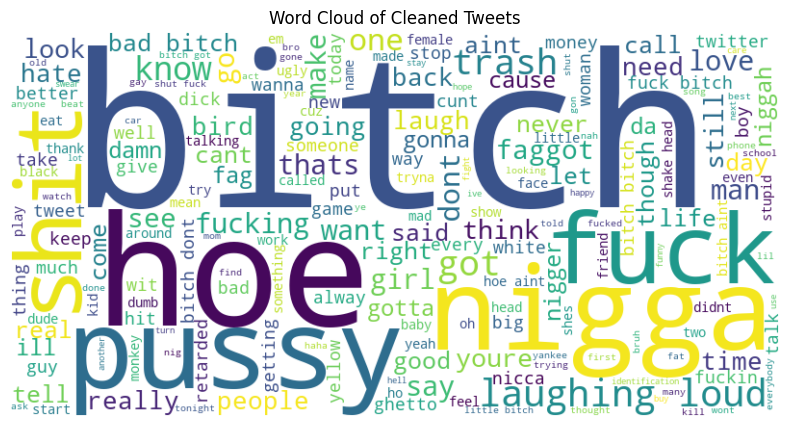

In [288]:
def visualize_data(df, text_column):
    """
    Visualize the text data using a word cloud.

    """
    text = ' '.join(df[text_column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Cleaned Tweets')
    plt.show()

visualize_data(df, text_column)
